In [2]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [6]:
df = pd.read_csv('data/Pokemon.csv')
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


c:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

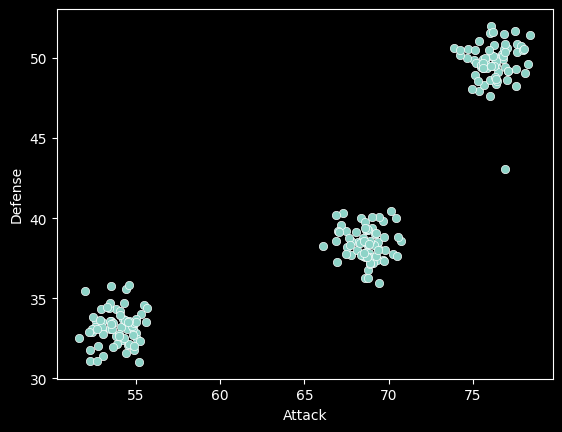

In [10]:
X = df[['Attack', 'Defense']]
sns.scatterplot(df.Attack, df.Defense)

In [20]:
# импортируем нужный модуль k-means-кластеризации


# инициализируем алгоритм, при желании задаём разные параметры для алгоритма
k_means = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)

# обучаем модель на данных, передав матрицу наблюдений X
k_means.fit(X)

# предскажем, к какому кластеру принадлежат покемоны 
predictions = k_means.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = k_means.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions
# получаем результаты кластеризации (список меток, к какому кластеру относится каждый объект из X)
labels = k_means.labels_

c:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

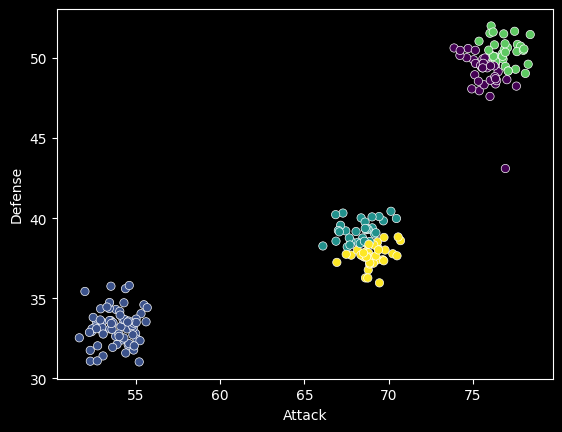

In [21]:
sns.scatterplot(df.Attack, df.Defense, c=predictions)

In [25]:
# добавляем третий признак — скорость покемона, алгоритм такой же
X = df[['Attack', 'Defense', 'Speed']]
 
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
 
# запускаем обучение модели
kmeans.fit(X)
 
# предсказываем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

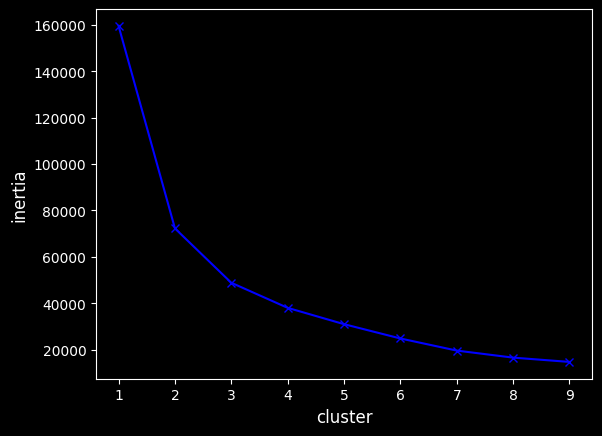

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

def get_inertia(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    inertia = k_means.inertia_
    return inertia

inertia = []

for cluster_num in range(1,10):
    inertia.append(get_inertia(cluster_num,X))

plt.xlabel('cluster', fontsize=12)
plt.ylabel('inertia', fontsize=12)

plt.plot([i for i in range(1,10)], inertia, 'xb-')

[0.4575637148632728,
 0.3738598545787158,
 0.4000907249808589,
 0.36380530487519286,
 0.3896294142266388,
 0.42696770420293195,
 0.4462592260880442,
 0.44849339252042864]

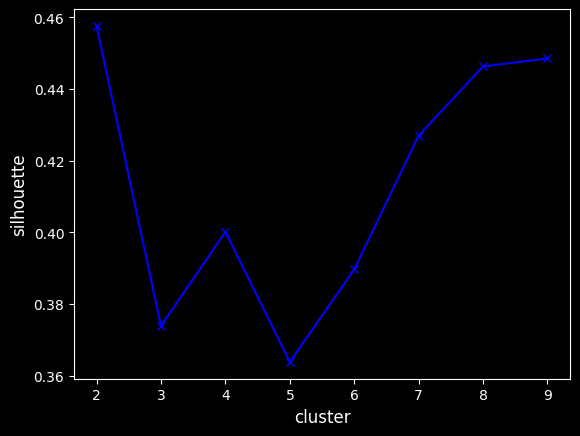

In [45]:
from sklearn.metrics import silhouette_score
def get_silhouette(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouettes = []
for cluster_num in range(2, 10):
    silhouettes.append(get_silhouette(cluster_num, X))
    
display(silhouettes)

plt.xlabel('cluster', fontsize=12)
plt.ylabel('silhouette', fontsize=12)
plt.plot([i for i in range(2,10)], silhouettes, 'xb-')

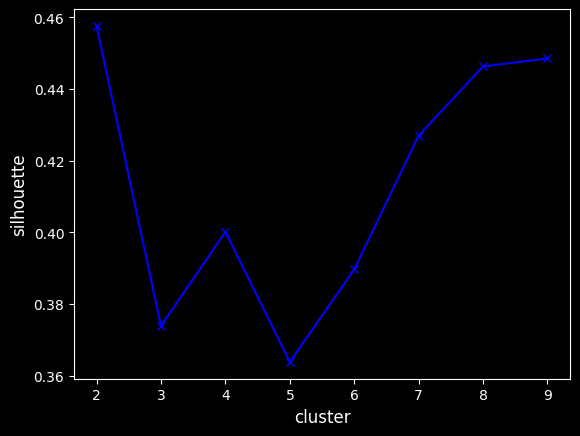

In [36]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчёте метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, X))

# визуализируем коэффициенты силуэта для разного количества кластеров
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouette, 'xb-')

In [47]:
df = pd.read_csv('data/values_from_the_instrument.csv')
df.head(10)

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278
5,63.460035,60.134125
6,57.650859,73.063800
7,57.686945,76.317818
8,64.163588,58.475185
9,60.712352,73.484624


c:\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='x1', ylabel='x2'>

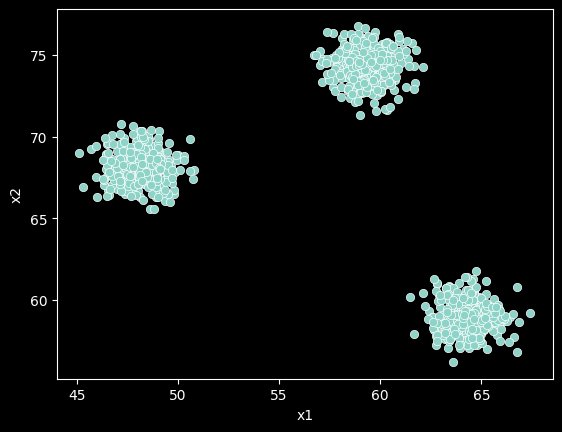

In [48]:
X = df[['x1', 'x2']]
sns.scatterplot(df.x1, df.x2)

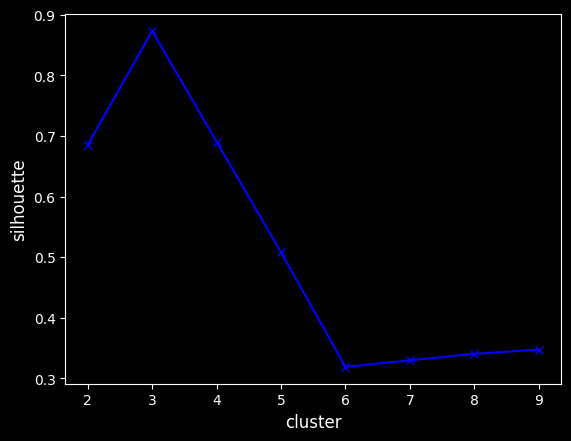

In [49]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчёте метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = []
for clust_num in range(2, 10):
    silhouette.append(get_silhouette(clust_num, X))

# визуализируем коэффициенты силуэта для разного количества кластеров
plt.xlabel("cluster", fontsize=12)
plt.ylabel("silhouette", fontsize=12)
plt.plot([i for i in range(2, 10)], silhouette, 'xb-')

In [51]:
from sklearn.metrics.cluster import homogeneity_score

print(homogeneity_score(labels_true=[0,0,1,1], labels_pred=[0,0,1,1]))

1.0


In [54]:
from sklearn.metrics.cluster import completeness_score

completeness_score(labels_true=[0,0,1,1], labels_pred=[0,0,1,1])

1.0

In [57]:
# импортируем из библиотеки sklearn подсчёт индекса Рэнда
from sklearn.metrics.cluster import rand_score
# передаём в rand_score размеченные и предсказанные данные
rand_score([0, 0, 1, 1], [0, 0, 1, 1])
1.0

1.0

In [59]:
from sklearn.metrics.cluster import homogeneity_score

print(homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]))

0.737175493807016
